# Advanced Datasets

In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/img.tar.gz

In [7]:
! tar -xf img.tar.gz

In [1]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv 

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/phtn458/.wget-hsts'. HSTS will be disabled.
--2020-01-13 23:57:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/datasets/index.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv.2’

index.csv.2         100%[===================>]   1.60M  3.09MB/s    in 0.5s    

2020-01-13 23:57:56 (3.09 MB/s) - ‘index.csv.2’ saved [1680905/1680905]



In [3]:
import torch
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)

from matplotlib.pyplot import imshow
from PIL import Image

import pandas as pd
import os

In [4]:
# create a picture frame

def show_data(data_sample, shape= (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y: ' + data_sample[1])

In [5]:
# Read csv file

directory = ''
csv_file = 'index.csv'
csv_path = os.path.join(directory, csv_file)

dn = pd.read_csv(csv_path) # data_name
print(dn.head(), '\n')

print(dn.iloc[0,0], dn.iloc[0,1])
print(dn.iloc[1,0], dn.iloc[1,1])
print('rows: ', dn.shape[0])


     category             image
0  Ankle boot  img/fashion0.png
1     T-shirt  img/fashion1.png
2     T-shirt  img/fashion2.png
3       Dress  img/fashion3.png
4     T-shirt  img/fashion4.png 

Ankle boot img/fashion0.png
T-shirt img/fashion1.png
rows:  60000


# Load Image

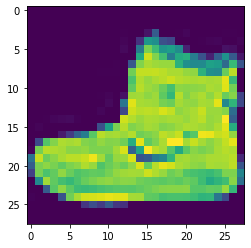

In [10]:
image_name = dn.iloc[0,1]
image_path = os.path.join(directory, image_name)

image = Image.open(image_path)

plt.imshow(image)


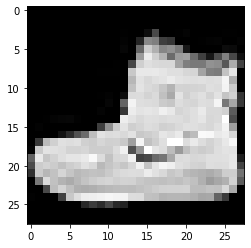

In [11]:
# set to grayscale

plt.imshow(image, cmap='gray')

🔭  not sure if it's necessary to set `vmin=0` and `vmax=255` but here you go:

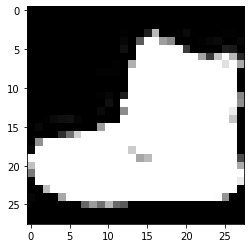

In [12]:
plt.imshow(image, cmap='gray', vmin=0, vmax=100)

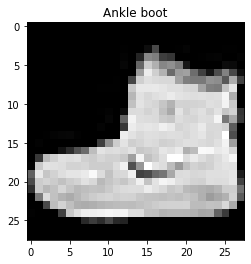

In [13]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(dn.iloc[0,0])
plt.show()

<!>

# 🧾  Create a Dataset Class

*\"happy days\"*

In [14]:
class Dataset(Dataset):
    
    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir = data_dir
        
        # The transform is going to be used on image
        self.transform = transform
        csv_file_path = os.path.join(self.data_dir, csv_file)
        
        # Load the CSV file that contains the image info
        self.data_name = pd.read_csv(csv_file_path)
        
        # Number of images in dataset
        self.len = self.data_name.shape[0]
        
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        
        # Open image file
        image = Image.open(img_name)
        # Class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)
            
        return image, y
    

<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F53A1FFEB50>
Ankle boot
size:  (28, 28)


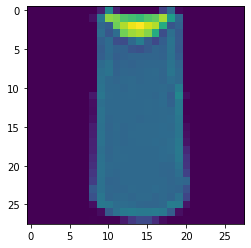

In [17]:
# Create the dataset objects

dataset = Dataset(csv_file=csv_file, data_dir=directory)

# print(dataset)

image_one = dataset[2][0]
label = dataset[0][1]
plt.imshow(image_one)

print(image_one)
print(label)
print('size: ', image_one.size)


In [25]:
import torchvision.transforms as transforms

torch.Size([1, 20, 20])


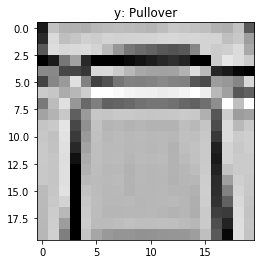

In [37]:
# compose transforms to crop and convert the image to tensor
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=croptensor_data_transform)

img = dataset[0][0]
print(img.size())

show_data(dataset[5], shape=(20,20))
# plt.imshow(img)

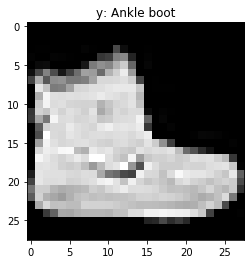

In [60]:
fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])

dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=fliptensor_data_transform)
show_data(dataset[0])